In [1]:
import numpy as np
import pandas as pd

In [3]:
import keras, os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras_preprocessing.image import ImageDataGenerator

In [7]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory = "glasses-noglasses/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="glasses-noglasses/validate", target_size=(224,224))

Found 104 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [9]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3), filters=64, 
                 kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',
                activation='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same',
                activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same",
                 activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same",
                 activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same",
                 activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same",
                 activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same",
                 activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same",
                 activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same",
                 activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same",
                 activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same",
                 activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same",
                 activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [10]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [11]:
model.compile(optimizer='adam', 
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy']) 

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

In [13]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', 
                             verbose=1, save_best_only=True, 
                             save_weights_only=False, 
                             mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, 
                      patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=1,
                           generator=traindata, 
                           validation_data= testdata, 
                           validation_steps=1,epochs=50,
                           callbacks=[checkpoint,early])

Epoch 1/50


/var/folders/hf/qkfsvh955rdfrr2bjwhvvm2r0000gn/T/ipykernel_13673/2671246178.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(steps_per_epoch=1,
2023-01-31 14:33:36.300477: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-31 14:33:36.594507: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 0.6772 - accuracy: 0.6250

2023-01-31 14:33:39.749646: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 0.6772 - accuracy: 0.6250 - val_loss: 3459.6362 - val_accuracy: 0.4688
Epoch 2/50
1/1 [==============================] - 2s 2s/step - loss: 3506.0166 - accuracy: 0.4688 - val_loss: 1.6712 - val_accuracy: 0.4688
Epoch 3/50
1/1 [==============================] - 1s 1s/step - loss: 0.4327 - accuracy: 0.8750 - val_loss: 0.7670 - val_accuracy: 0.4688
Epoch 4/50
1/1 [==============================] - 1s 949ms/step - loss: 0.5799 - accuracy: 0.7500 - val_loss: 13.0034 - val_accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 2s 2s/step - loss: 14.2605 - accuracy: 0.4375 - val_loss: 0.7687 - val_accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 1s 952ms/step - loss: 0.9727 - accuracy: 0.2500 - val_loss: 0.7050 - val_accuracy: 0.4688
Epoch 7/50
1/1 [==============================] - 1s 943ms/step - loss: 0.6113 - accuracy: 0.8750 - val_loss: 1.7175 - val_accuracy: 0.4688
Epoch 8/50
1/1 [===================

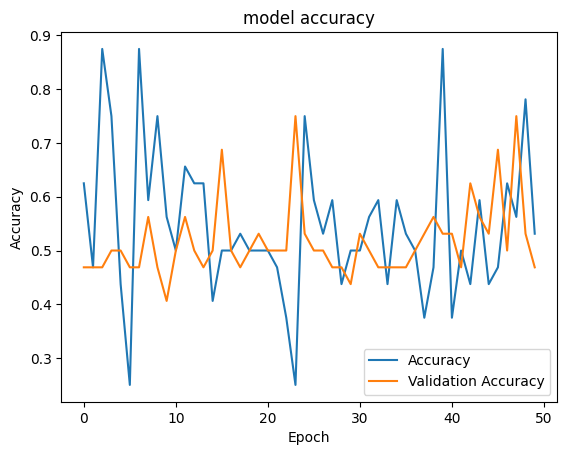

In [14]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [15]:
model.save("vgg16_1.h5")

1/1 [==============================] - 0s 90ms/step
no-glasses


2023-01-31 14:39:29.377705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


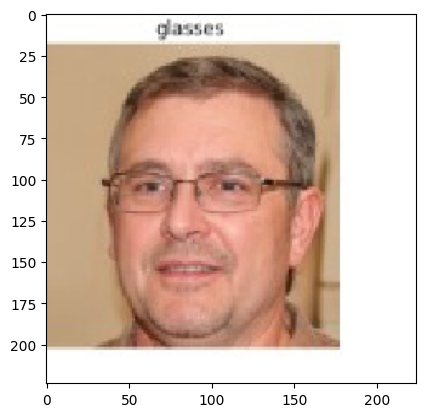

In [20]:
from keras.preprocessing import image
import tensorflow as tf
img = tf.keras.utils.load_img("glasses-noglasses/test/row-1-column-9.jpg",
                     target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)

img = np.expand_dims(img, axis=0)

from keras.models import load_model
saved_model = load_model("vgg16_1.h5")
output = saved_model.predict(img)

if output[0][0] > output[0][1]:
    print("glasses")
else:
    print('no-glasses')